In [2]:
from math import sqrt, factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy import stats, fftpack
from matplotlib.colors import LogNorm

%matplotlib inline

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The Z-score is 3.466, with a p-value alpha=0.0003 (our significance level)
The probability of having 15 hurricanes in 1 year using the poisson distribution with average set to 6.3 is 0.0014
The p-value for the distribution is P=0.0022
Being p-value for the poisson distribution above the significance level (P>alpha) we can say that the number of hurricanes in 2015 was significantly different from the average


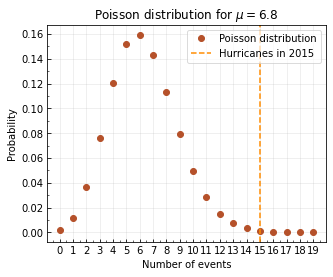

In [26]:
# definition of poisson statistics
def poisson(n, mu):
    return pow(mu, n) * np.exp(-avg)/factorial(n)

# data
N = 15
avg = 6.3

# plot of the statistics and pdf
n_space = np.arange(0, 20, 1)
poiss = [poisson(i, avg) for i in n_space]
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_space, poiss, marker='o', color='#b5512a', label='Poisson distribution', linestyle = 'None')
ax.axvline(N, linestyle='--', color='darkorange', label='Hurricanes in 2015')
ax.set_title('Poisson distribution for $\mu=6.8$')
ax.set_xlabel('Number of events')
ax.set_ylabel('Probability')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)
_ = ax.legend(framealpha = 0.7)

# Z
Z = abs(N-avg) / np.sqrt(avg)
pvalueZ = (1. - stats.norm.cdf(Z))
print("The Z-score is %.3f, with a p-value alpha=%.4f (our significance level)" %(Z, pvalueZ))

# printing the result
print("The probability of having 15 hurricanes in 1 year using the poisson distribution with average set to 6.3 is %.4f" 
    %(poisson(N, avg)))
print("The p-value for the distribution is P=%.4f" %(1-np.sum([poisson(N, avg) for N in range(15)])))
print("Being p-value for the poisson distribution above the significance level (P>alpha) we can say that the number of hurricanes in 2015 was significantly different from the average")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Null hypotesis: the change is not significant

T = -3.79
p-value = 0.0043
Being the p-value below 5% (significance level) we can reject the null hypotesis, the change is statistically significant.


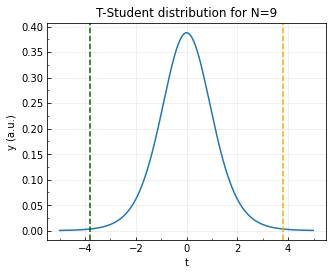

In [31]:
# data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma = sqrt((np.std(pre, ddof=1)**2 + np.std(post, ddof=1)**2) / 2)
n = np.size(pre)

# T value
T = (np.mean(pre) - np.mean(post)) / (sigma * sqrt(2/n))

# plot the test statistics and its pdf
x_space = np.arange(-5, +5, 0.01)
t = stats.t.pdf(x_space, np.size(pre) - 1)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x_space, t, color='#1f77b4', label='T-Student distribution')
ax.axvline(T, linestyle='--', color='darkgreen', label='T')
ax.axvline(-T, linestyle='--', color='orange', label='-T')
ax.set_title('T-Student distribution for N=%d' %(np.size(pre) - 1))
ax.set_xlabel('t')
ax.set_ylabel('y (a.u.)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)

# p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))

# printing the result
print("Null hypotesis: the change is not significant\n")
print("T = %.2f" %T)
print("p-value = %.4f" %pvalue)
print("Being the p-value below 5% (significance level) we can reject the null hypotesis, the change is statistically significant.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

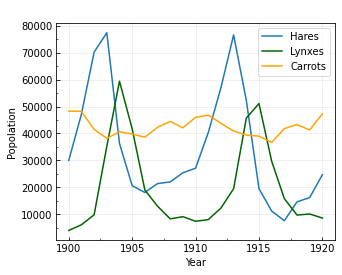

In [70]:
# get data
populations = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = populations.T

# plot data
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(year, hares, color='#1f77b4', label='Hares')
ax.plot(year, lynxes, color='darkgreen', label='Lynxes')
ax.plot(year, carrots, color='orange', label='Carrots')
ax.set_title(' ')
ax.set_xlabel('Year')
ax.set_ylabel('Popolation')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)
_ = ax.legend(framealpha = 0.7)

Hares peak frequency: 0.0952 1/year => period of 10.5 years
Lynxes peak frequency: 0.0952 1/year => period of 10.5 years
Carrots peak frequency: 0.0952 1/year => period of 10.5 years


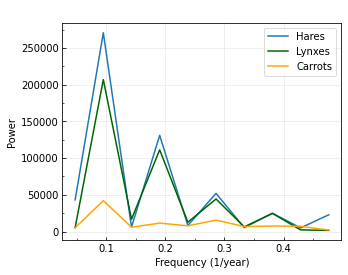

In [71]:
# FFT of the signals and power
hares_fft  = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)
hares_fft_pow  = np.abs(hares_fft)
lynxes_fft_pow = np.abs(lynxes_fft)
carrots_fft_pow = np.abs(carrots_fft)

# frequencies 
hares_freq = fftpack.fftfreq(hares.size, d=1) 
lynxes_freq = fftpack.fftfreq(lynxes.size, d=1)
carrots_freq = fftpack.fftfreq(carrots.size, d=1)

# max peaks and their frequencies
hares_mask = np.where(hares_freq > 0)
lynxes_mask = np.where(lynxes_freq > 0)
carrots_mask = np.where(carrots_freq > 0)
hares_peak_freq  = hares_freq[hares_mask][hares_fft_pow[hares_mask].argmax()]
lynxes_peak_freq = lynxes_freq[lynxes_mask][lynxes_fft_pow[lynxes_mask].argmax()]
carrots_peak_freq = carrots_freq[carrots_mask][carrots_fft_pow[carrots_mask].argmax()]

# print results
print("Hares peak frequency: %.4f 1/year => period of %.1f years"%(hares_peak_freq, 1/hares_peak_freq))
print("Lynxes peak frequency: %.4f 1/year => period of %.1f years"%(lynxes_peak_freq, 1/lynxes_peak_freq))
print("Carrots peak frequency: %.4f 1/year => period of %.1f years"%(carrots_peak_freq, 1/carrots_peak_freq))

# plot
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(hares_freq[hares_mask], hares_fft_pow[hares_mask], color='#1f77b4', label='Hares')
ax.plot(lynxes_freq[lynxes_mask], lynxes_fft_pow[lynxes_mask], color='darkgreen', label='Lynxes')
ax.plot(carrots_freq[carrots_mask], carrots_fft_pow[carrots_mask], color='orange', label='Carrots')
ax.set_title(' ')
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('Power')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)
_ = ax.legend(framealpha = 0.7)

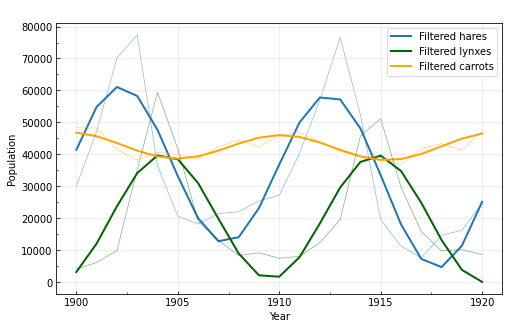

In [78]:
# cleaning the data from noise -> apply a filter for frequencies higher that peak_freq
hares_high_freq = hares_fft.copy()
lynxes_high_freq = lynxes_fft.copy()
carrots_high_freq = carrots_fft.copy()
hares_high_freq[np.abs(hares_freq) > hares_peak_freq] = 0
lynxes_fft[np.abs(lynxes_freq)>lynxes_peak_freq] = 0
carrots_fft[np.abs(carrots_freq)>carrots_peak_freq] = 0

# inverse fast fourier transform
filtered_hares = np.real(fftpack.ifft(hares_high_freq))
filtered_lynxes = np.real(fftpack.ifft(lynxes_high_freq))
filtered_carrots = np.real(fftpack.ifft(carrots_high_freq))

# plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(year, filtered_hares, color='#1f77b4', label='Filtered hares', lw=2)
ax.plot(year, filtered_lynxes, color='darkgreen', label='Filtered lynxes', lw=2)
ax.plot(year, filtered_carrots, color='orange', label='Filtered carrots', lw=2)
ax.plot(year, hares, color='#1f77b4', alpha=0.5, lw=0.7)
ax.plot(year, lynxes, color='darkgreen', alpha=0.5, lw=0.7)
ax.plot(year, carrots, color='orange', alpha=0.5, lw=0.7)
ax.set_title(' ')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
ax.set_axisbelow(True)
_ = ax.legend(framealpha = 0.7)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Filtered image')

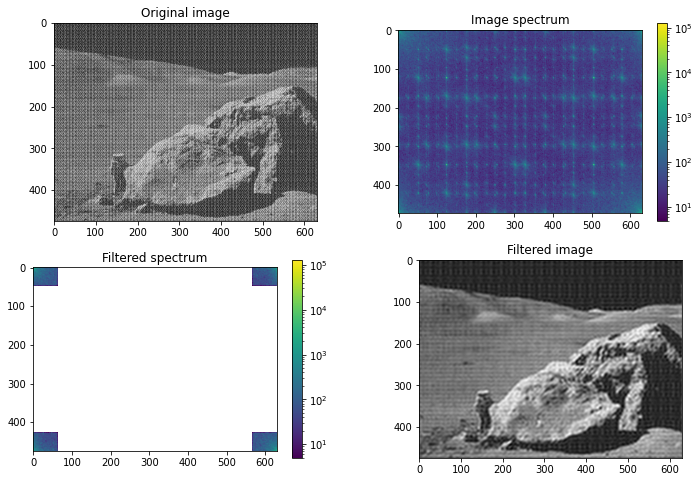

In [30]:
# get the image and plot it
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(12,8))
image = plt.imread("moonlanding.png")
ax[0,0].imshow(image, cmap='gray')
ax[0,0].set_title('Original image')

# FFT and plot
fft = fftpack.fft2(image)
power = np.abs(fft)
im = ax[0,1].imshow(power, norm=LogNorm(vmin=5))
ax[0,1].set_title('Image spectrum')
fig.colorbar(im, ax=ax[0,1])

# selection of FFT
r,c = np.shape(fft)
frac = 0.1
fft_select = fft
fft_select[int(r*frac):-int(r*frac)]=0
fft_select[:, int(c*frac):-int(c*frac)]=0
power_select = np.abs(fft_select)

# plot selected FFT
im_select = ax[1,0].imshow(power_select, norm=LogNorm(vmin=5))
ax[1,0].set_title('Filtered spectrum')
fig.colorbar(im_select, ax=ax[1,0])

# inverse FFT and plot new image
image2 = fftpack.ifft2(fft_select).real
ax[1,1].imshow(image2, cmap='gray')
ax[1,1].set_title('Filtered image')